<a href="https://colab.research.google.com/github/syedsajidhussain/Tract-segmentation/blob/main/visualization_quantitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative evaluation

## Setup

### Modules

In [ ]:
from pathlib import Path

import autorank
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Orange
import pickle
import scipy.stats as spst
import scikit_posthocs
import seaborn as sns

import tractseg.config as config
import tractseg.data.dataset_specific_utils

plt.rcParams.update(
    {
        "legend.fontsize": 9,
        "axes.labelsize": 9,
        "axes.titlesize": 9,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
    }
)

### Data

In [ ]:
DATASET = "HCP105"
CLASSSET = "bundles_all72"
CVFOLD = 0

EXPERIMENTS = ["peaks", "fodfs", "rank_3_approx"]
FILENAME_RESULTS = "experiment_test.pkl"

path_dir_experiments = Path(config.PATH_DIR_EXP)
paths_results = [path_dir_experiments / experiment / FILENAME_RESULTS for experiment in EXPERIMENTS]

### Utilities

In [ ]:
def loadall(path):
    with open(path, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break


def load_results(path):
    result = list(loadall(path))[0]
    return result

## Plotting results

In [ ]:
subjects_test = np.asarray(tractseg.data.dataset_specific_utils.get_cvfold(DATASET, CVFOLD)[2])
tracts = np.asarray(tractseg.data.dataset_specific_utils.get_classes(CLASSSET))

display(subjects_test[:5], tracts[:5])

array(['904044', '907656', '910241', '912447', '917255'], dtype='<U6')

array(['AF_left', 'AF_right', 'ATR_left', 'ATR_right', 'CA'], dtype='<U14')

In [ ]:
results = dict(zip(EXPERIMENTS, [load_results(path_result) for path_result in paths_results]))

display(results)

{'peaks': {'metrics': {'loss_test': [0.0],
   'f1_macro_test': [0.8374918984973109]},
  'metrics_bundles': {'AF_left': [0.8703017677693398],
   'AF_right': [0.8610039905446006],
   'ATR_left': [0.8805388370510302],
   'ATR_right': [0.8755520519552472],
   'CA': [0.6607658231591683],
   'CC_1': [0.8278656599229768],
   'CC_2': [0.9185710433869816],
   'CC_3': [0.8251559266692828],
   'CC_4': [0.8754922129839151],
   'CC_5': [0.836432379573176],
   'CC_6': [0.8565621479871256],
   'CC_7': [0.7852310664114759],
   'CG_left': [0.8448743421442764],
   'CG_right': [0.8594297746656397],
   'CST_left': [0.8568537083784195],
   'CST_right': [0.8499797681913531],
   'MLF_left': [0.882479008661035],
   'MLF_right': [0.8722326666014252],
   'FPT_left': [0.8773487474718442],
   'FPT_right': [0.872038192995397],
   'FX_left': [0.6906533881898306],
   'FX_right': [0.6314861120730949],
   'ICP_left': [0.8297198980842085],
   'ICP_right': [0.8243689964109762],
   'IFO_left': [0.8172080790440275],
   'I

### Per subject

In [ ]:
dices_subjects = np.asarray([results[experiment]["f1_scores"] for experiment in EXPERIMENTS])

display(dices_subjects)

array([[0.8438301 , 0.84177501, 0.85179342, 0.8080041 , 0.826523  ,
        0.82484951, 0.83995137, 0.84467087, 0.85093374, 0.86132758,
        0.83418549, 0.84102005, 0.81973322, 0.81280036, 0.84180717,
        0.83078424, 0.86054064, 0.84432991, 0.83826987, 0.82160042,
        0.8485998 ],
       [0.84436181, 0.84502613, 0.85439893, 0.81656765, 0.82685134,
        0.82956553, 0.83981766, 0.8475285 , 0.85304827, 0.86577488,
        0.8368057 , 0.84389208, 0.82074531, 0.81546367, 0.84568185,
        0.83150795, 0.8637387 , 0.8486642 , 0.84045085, 0.82488995,
        0.85052776],
       [0.84160407, 0.84510996, 0.85040296, 0.80668697, 0.82304057,
        0.82469242, 0.83788216, 0.84157338, 0.8495633 , 0.86189783,
        0.83473148, 0.83979646, 0.81602618, 0.81033315, 0.84072615,
        0.8276121 , 0.85918254, 0.8442564 , 0.83844899, 0.81565337,
        0.84768163]])

In [ ]:
dices_means = np.mean(dices_subjects, axis=1)

display(dices_means)

array([0.8374919 , 0.8402528 , 0.83604296])

In [ ]:
differences_means = np.mean(np.abs(dices_subjects - dices_means[:, None]), axis=0)
subject_closest_to_means = subjects_test[np.argmin(differences_means)]

display(subject_closest_to_means)

'987983'

In [ ]:
def plot_results_subjects(dices_subjects):
    dina4 = np.array([0.12, 0.08]) * 39.37
    fig = plt.figure(figsize=dina4)
    ax = fig.add_subplot(1, 1, 1)

    sns.boxplot(
        data=dices_subjects.T,
        orient="y",
        showmeans=True,
        meanprops={"color": "tab:red"},
        meanline=True,
        ax=ax,
    )

    ax.set_xlabel("Dice")
    # ax.set_ylabel("Tract")
    ax.set_yticks(np.arange(dices_subjects.shape[0]))
    ax.set_yticklabels(["fODF peaks", "fODF tensor", r"rank-$3$" + "\napproximation"])
    ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
    ax.grid(alpha=0.6, axis="x")

    def set_xmargin(ax, left=0.0, right=0.0):
        ax.set_xmargin(0)
        ax.autoscale_view()
        lim = ax.get_xlim()
        delta = np.diff(lim)
        left = lim[0] - delta * left
        right = lim[1] + delta * right
        ax.set_xlim(left, right)

    set_xmargin(ax, left=0.26, right=0.05)

    dices_means = np.mean(dices_subjects, axis=1).round(4)
    offset = np.mean(dices_subjects) * 0.05

    for ytick in ax.get_yticks():
        ax.text(
            np.min(dices_subjects) - 0.01,
            ytick + 0.05,
            dices_means[ytick],
            horizontalalignment="center",
            size="x-small",
            color="tab:red",
            weight="semibold",
        )

    plt.tight_layout()
    plt.savefig("quantitative_results.png", dpi=600)

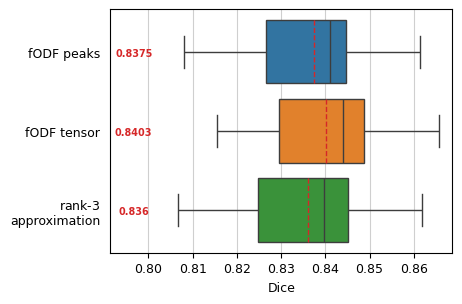

In [ ]:
plot_results_subjects(dices_subjects)

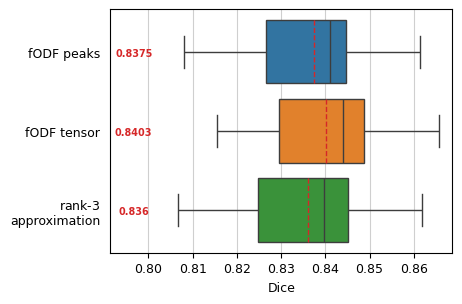

In [ ]:
plot_results_subjects(dices_subjects)

### Per tract

In [ ]:
def sort_results(results, tracts):
    # Kind of terrible format the data is stored in the pickle.
    dices_bundles = [np.asarray(list(results[experiment]["metrics_bundles"].values())).T[0] for experiment in EXPERIMENTS]
    ids_sorted = np.argsort(dices_bundles[0])

    dices_bundles_sorted = [dice_bundles[ids_sorted] for dice_bundles in dices_bundles]
    tracts_sorted = tracts[ids_sorted]
    return dices_bundles_sorted, tracts_sorted

In [ ]:
def plot_results_tracts(dices_bundles_sorted, tracts_sorted):
    dina4 = np.array([0.12, 0.297]) * 39.37
    fig = plt.figure(figsize=dina4)
    ax = fig.add_subplot(1, 1, 1)

    # Keep plotting explicit.
    ax.scatter(dices_bundles_sorted[0], tracts_sorted, marker="o", label=r"fODF peaks")
    ax.scatter(dices_bundles_sorted[1], tracts_sorted, marker="*", label=r"fODF tensor")
    ax.scatter(dices_bundles_sorted[2], tracts_sorted, marker="+", label=r"Rank-$3$ approximation")

    ax.set_xlabel("Dice")
    # ax.set_ylabel("Tract")
    ax.set_ymargin(0.015)
    ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
    ax.grid(alpha=0.6)
    ax.legend()

    plt.tight_layout()
    plt.savefig("quantitative_results_tracts.svg")

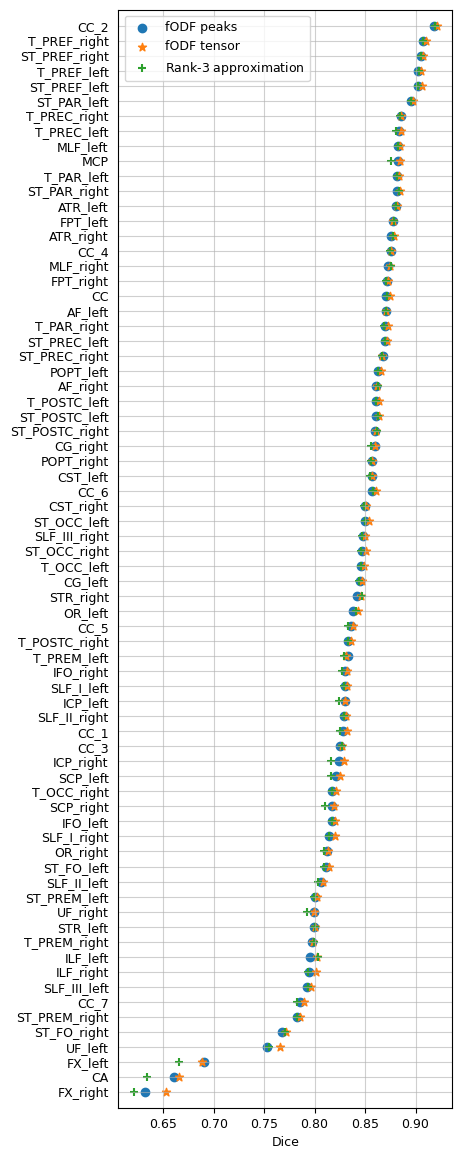

In [ ]:
dices_bundles_sorted, tracts_sorted = sort_results(results, tracts)

plot_results_tracts(dices_bundles_sorted, tracts_sorted)

In [ ]:
def plot_results_tracts_landscape(dices_bundles_sorted, tracts_sorted):
    dina4 = np.array([0.297, 0.12]) * 39.37
    fig = plt.figure(figsize=dina4)
    ax = fig.add_subplot(1, 1, 1)

    # Keep plotting explicit.
    ax.scatter(tracts_sorted[::-1], dices_bundles_sorted[0][::-1], marker="o", label=r"fODF peaks")
    ax.scatter(tracts_sorted[::-1], dices_bundles_sorted[1][::-1], marker="*", label=r"fODF tensor")
    ax.scatter(tracts_sorted[::-1], dices_bundles_sorted[2][::-1], marker="+", label=r"Rank-$3$ approximation")

    ax.set_ylabel("Dice")
    ax.set_xlabel("Tract")
    ax.set_xmargin(0.015)
    ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(alpha=0.6)
    ax.legend()

    plt.tight_layout()
    plt.savefig("quantitative_results_tracts.png", dpi=600)

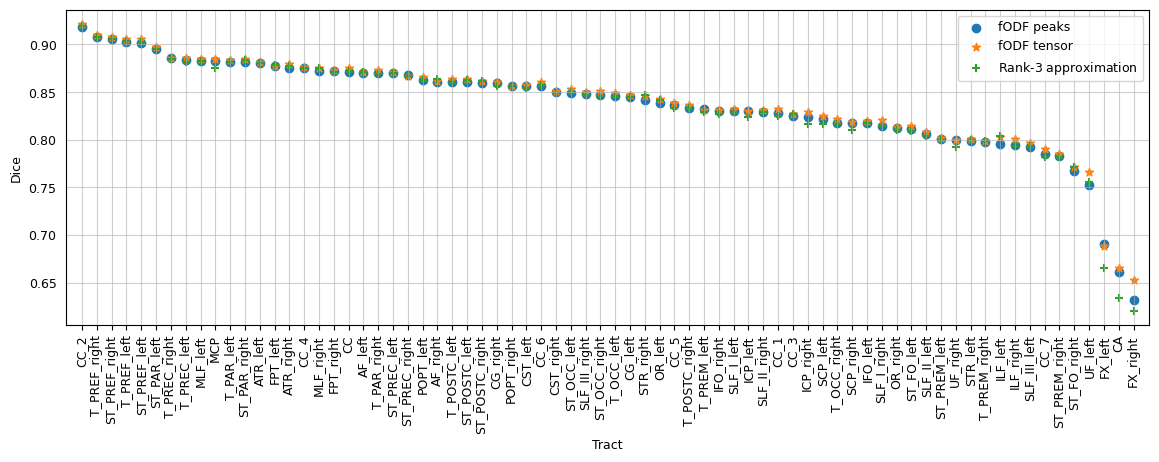

In [ ]:
dices_bundles_sorted, tracts_sorted = sort_results(results, tracts)

plot_results_tracts_landscape(dices_bundles_sorted, tracts_sorted)

## Statistical testing

In [ ]:
df_dices_subjects = pd.DataFrame(dices_subjects)

display(df_dices_subjects)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.843830,0.841775,0.851793,0.808004,0.826523,0.824850,0.839951,0.844671,0.850934,0.861328,...,0.841020,0.819733,0.812800,0.841807,0.830784,0.860541,0.844330,0.838270,0.821600,0.848600
1,0.844362,0.845026,0.854399,0.816568,0.826851,0.829566,0.839818,0.847529,0.853048,0.865775,...,0.843892,0.820745,0.815464,0.845682,0.831508,0.863739,0.848664,0.840451,0.824890,0.850528
2,0.841604,0.845110,0.850403,0.806687,0.823041,0.824692,0.837882,0.841573,0.849563,0.861898,...,0.839796,0.816026,0.810333,0.840726,0.827612,0.859183,0.844256,0.838449,0.815653,0.847682


In [ ]:
result_friedman = spst.friedmanchisquare(*dices_subjects)

display(result_friedman)

FriedmanchisquareResult(statistic=29.809523809523796, pvalue=3.3646829750653805e-07)

In [ ]:
result_nymenyi = scikit_posthocs.posthoc_nemenyi_friedman(dices_subjects.T)

display(result_nymenyi)

,0,1,2
0,1.000000,0.001988,0.110842
1,0.001988,1.000000,0.001000
2,0.110842,0.001000,1.000000


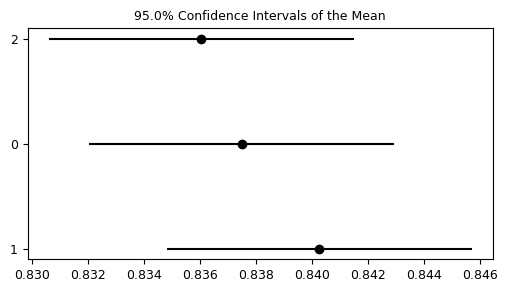

In [ ]:
result = autorank.autorank(df_dices_subjects.T, alpha=0.05)
autorank.plot_stats(result)
plt.show()

In [4]:
# dina4 = np.array([0.297, 0.12]) * 39.37
# fig = plt.figure(figsize=dina4)
# ax = fig.add_subplot(1, 1, 1)

names = ["fODF peaks", "fODF tensor", r"Rank-$3$ approximation"]
avranks = df_dices_subjects.rank(axis=0).mean(axis=1).values
cd = Orange.evaluation.compute_CD(avranks, 21)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=1.6, textspace=0)
# plt.tight_layout()
plt.savefig("nemenyi_plot.png")

NameError: name 'df_dices_subjects' is not defined

In [2]:
df_dices_subjects = pd.DataFrame(dices_subjects)

display(df_dices_subjects)

NameError: name 'pd' is not defined

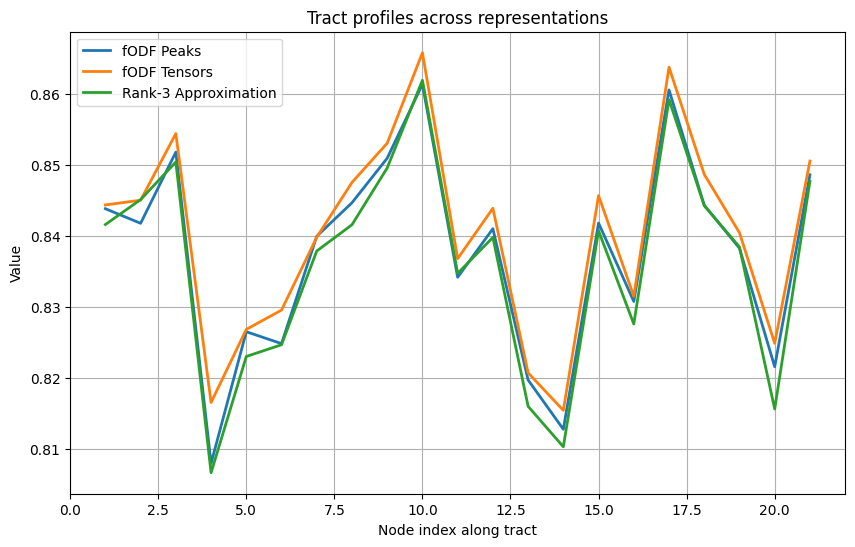

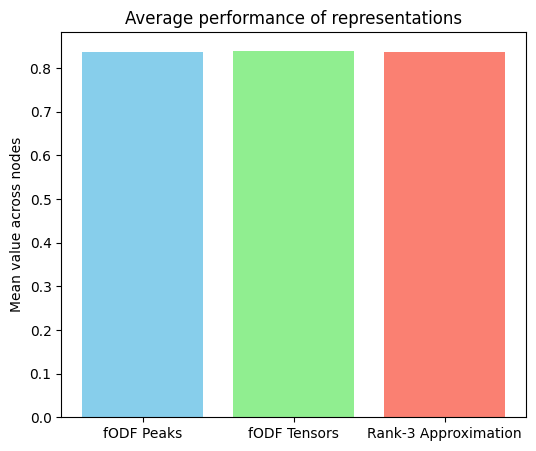

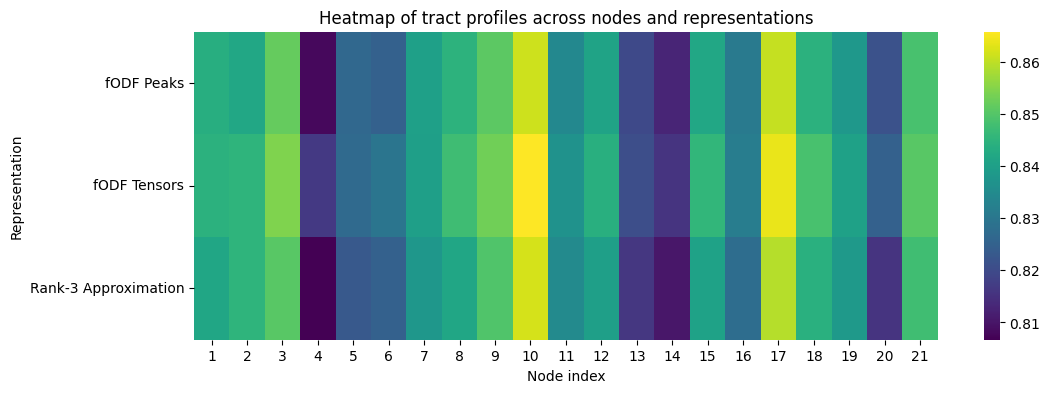

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your data (3 x 21)
data = np.array([
 [0.8438301 , 0.84177501, 0.85179342, 0.8080041 , 0.826523  ,
  0.82484951, 0.83995137, 0.84467087, 0.85093374, 0.86132758,
  0.83418549, 0.84102005, 0.81973322, 0.81280036, 0.84180717,
  0.83078424, 0.86054064, 0.84432991, 0.83826987, 0.82160042,
  0.8485998 ],
 [0.84436181, 0.84502613, 0.85439893, 0.81656765, 0.82685134,
  0.82956553, 0.83981766, 0.8475285 , 0.85304827, 0.86577488,
  0.8368057 , 0.84389208, 0.82074531, 0.81546367, 0.84568185,
  0.83150795, 0.8637387 , 0.8486642 , 0.84045085, 0.82488995,
  0.85052776],
 [0.84160407, 0.84510996, 0.85040296, 0.80668697, 0.82304057,
  0.82469242, 0.83788216, 0.84157338, 0.8495633 , 0.86189783,
  0.83473148, 0.83979646, 0.81602618, 0.81033315, 0.84072615,
  0.8276121 , 0.85918254, 0.8442564 , 0.83844899, 0.81565337,
  0.84768163]
])

labels = ["fODF Peaks", "fODF Tensors", "Rank-3 Approximation"]
nodes = np.arange(1, 22)

# --- 1. Line plot ---
plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(nodes, data[i], label=labels[i], linewidth=2)
plt.xlabel("Node index along tract")
plt.ylabel("Value")
plt.title("Tract profiles across representations")
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Bar chart (mean values) ---
means = data.mean(axis=1)
plt.figure(figsize=(6,5))
plt.bar(labels, means, color=["skyblue", "lightgreen", "salmon"])
plt.ylabel("Mean value across nodes")
plt.title("Average performance of representations")
plt.show()

# --- 3. Heatmap ---
plt.figure(figsize=(12,4))
sns.heatmap(data, cmap="viridis", xticklabels=nodes, yticklabels=labels, annot=False)
plt.xlabel("Node index")
plt.ylabel("Representation")
plt.title("Heatmap of tract profiles across nodes and representations")
plt.show()


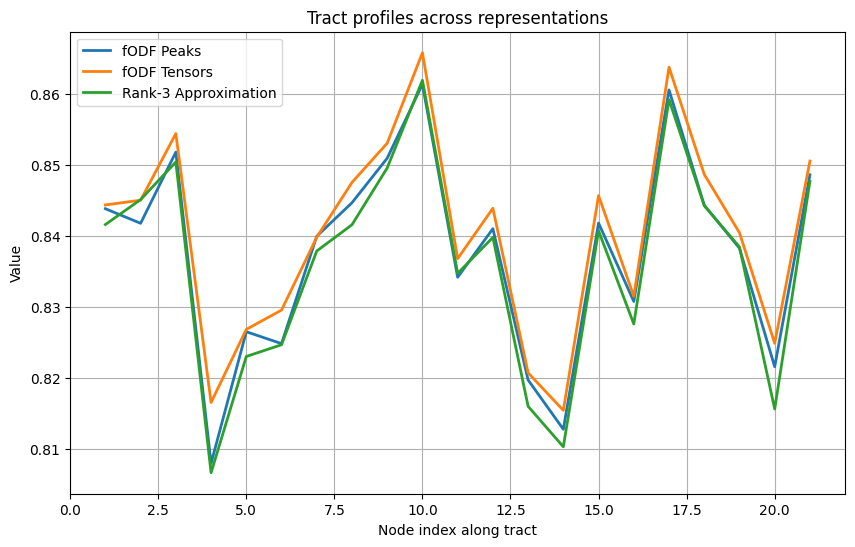

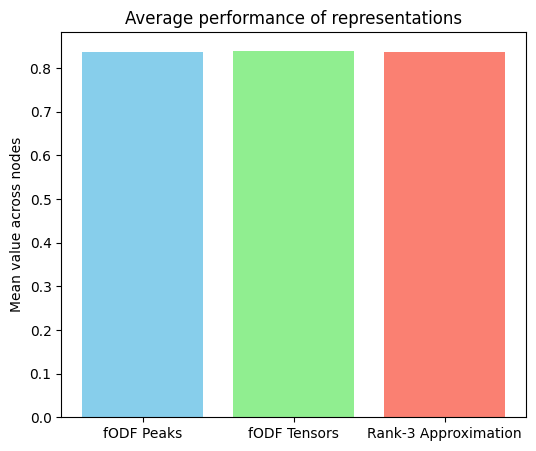

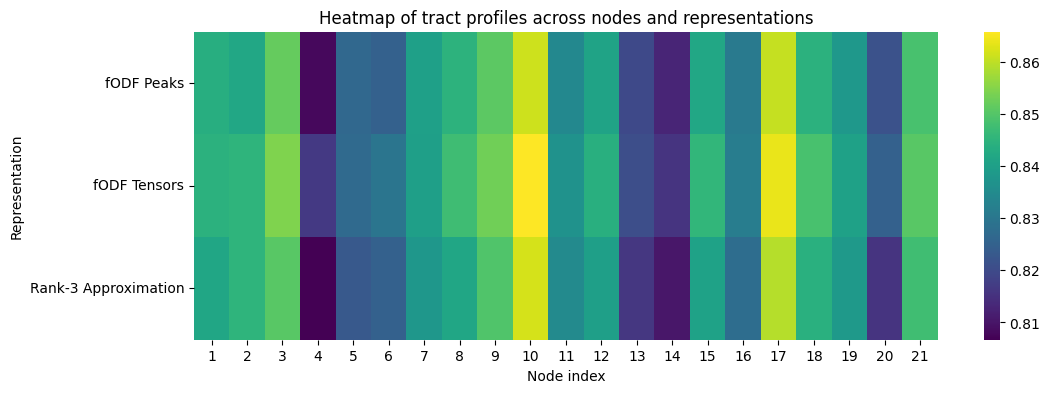

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your data (3 x 21)
data = np.array([
 [0.8438301 , 0.84177501, 0.85179342, 0.8080041 , 0.826523  ,
  0.82484951, 0.83995137, 0.84467087, 0.85093374, 0.86132758,
  0.83418549, 0.84102005, 0.81973322, 0.81280036, 0.84180717,
  0.83078424, 0.86054064, 0.84432991, 0.83826987, 0.82160042,
  0.8485998 ],
 [0.84436181, 0.84502613, 0.85439893, 0.81656765, 0.82685134,
  0.82956553, 0.83981766, 0.8475285 , 0.85304827, 0.86577488,
  0.8368057 , 0.84389208, 0.82074531, 0.81546367, 0.84568185,
  0.83150795, 0.8637387 , 0.8486642 , 0.84045085, 0.82488995,
  0.85052776],
 [0.84160407, 0.84510996, 0.85040296, 0.80668697, 0.82304057,
  0.82469242, 0.83788216, 0.84157338, 0.8495633 , 0.86189783,
  0.83473148, 0.83979646, 0.81602618, 0.81033315, 0.84072615,
  0.8276121 , 0.85918254, 0.8442564 , 0.83844899, 0.81565337,
  0.84768163]
])

labels = ["fODF Peaks", "fODF Tensors", "Rank-3 Approximation"]
nodes = np.arange(1, 22)

# --- 1. Line plot ---
plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(nodes, data[i], label=labels[i], linewidth=2)
plt.xlabel("Node index along tract")
plt.ylabel("Value")
plt.title("Tract profiles across representations")
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Bar chart (mean values) ---
means = data.mean(axis=1)
plt.figure(figsize=(6,5))
plt.bar(labels, means, color=["skyblue", "lightgreen", "salmon"])
plt.ylabel("Mean value across nodes")
plt.title("Average performance of representations")
plt.show()

# --- 3. Heatmap ---
plt.figure(figsize=(12,4))
sns.heatmap(data, cmap="viridis", xticklabels=nodes, yticklabels=labels, annot=False)
plt.xlabel("Node index")
plt.ylabel("Representation")
plt.title("Heatmap of tract profiles across nodes and representations")
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two tractometry CSV files
file1 = "/mnt/data/Tractometry_subject1.csv"
file2 = "/mnt/data/Tractometry_subject2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Display first few rows to understand the structure
df1.head(), df2.head()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Tractometry_subject1.csv'

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two tractometry CSV files
file1 = "/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject1.csv"
file2 = "/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Display first few rows to understand the structure
df1.head(), df2.head()


(  AF_left;AF_right;ATR_left;ATR_right;CA;CC_1;CC_2;CC_3;CC_4;CC_5;CC_6;CC_7;CG_left;CG_right;CST_left;CST_right;MLF_left;MLF_right;FPT_left;FPT_right;FX_left;FX_right;ICP_left;ICP_right;IFO_left;IFO_right;ILF_left;ILF_right;MCP;OR_left;OR_right;POPT_left;POPT_right;SCP_left;SCP_right;SLF_I_left;SLF_I_right;SLF_II_left;SLF_II_right;SLF_III_left;SLF_III_right;STR_left;STR_right;UF_left;UF_right;CC;T_PREF_left;T_PREF_right;T_PREM_left;T_PREM_right;T_PREC_left;T_PREC_right;T_POSTC_left;T_POSTC_right;T_PAR_left;T_PAR_right;T_OCC_left;T_OCC_right;ST_FO_left;ST_FO_right;ST_PREF_left;ST_PREF_right;ST_PREM_left;ST_PREM_right;ST_PREC_left;ST_PREC_right;ST_POSTC_left;ST_POSTC_right;ST_PAR_left;ST_PAR_right;ST_OCC_left;ST_OCC_right
 0  1.918053925037384033e-01;1.539989560842514038e...                                                                                                                                                                                                                        

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the CSV files after reset
file1 = "/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject1.csv"
file2 = "/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

df1.head(), df2.head()


(  AF_left;AF_right;ATR_left;ATR_right;CA;CC_1;CC_2;CC_3;CC_4;CC_5;CC_6;CC_7;CG_left;CG_right;CST_left;CST_right;MLF_left;MLF_right;FPT_left;FPT_right;FX_left;FX_right;ICP_left;ICP_right;IFO_left;IFO_right;ILF_left;ILF_right;MCP;OR_left;OR_right;POPT_left;POPT_right;SCP_left;SCP_right;SLF_I_left;SLF_I_right;SLF_II_left;SLF_II_right;SLF_III_left;SLF_III_right;STR_left;STR_right;UF_left;UF_right;CC;T_PREF_left;T_PREF_right;T_PREM_left;T_PREM_right;T_PREC_left;T_PREC_right;T_POSTC_left;T_POSTC_right;T_PAR_left;T_PAR_right;T_OCC_left;T_OCC_right;ST_FO_left;ST_FO_right;ST_PREF_left;ST_PREF_right;ST_PREM_left;ST_PREM_right;ST_PREC_left;ST_PREC_right;ST_POSTC_left;ST_POSTC_right;ST_PAR_left;ST_PAR_right;ST_OCC_left;ST_OCC_right
 0  1.918053925037384033e-01;1.539989560842514038e...                                                                                                                                                                                                                        

In [12]:
# Reload with proper semicolon separator
df1 = pd.read_csv(file1, sep=";")
df2 = pd.read_csv(file2, sep=";")

# Check structure again
df1.head(3), df2.head(3)


(    AF_left  AF_right  ATR_left  ATR_right        CA      CC_1      CC_2  \
 0  0.191805  0.153999  0.179947   0.130739  0.263155  0.175440  0.156723   
 1  0.267244  0.244623  0.274735   0.183082  0.290581  0.221865  0.248459   
 2  0.333228  0.321021  0.357909   0.245558  0.284290  0.301737  0.342781   
 
        CC_3      CC_4      CC_5  ...  ST_PREM_left  ST_PREM_right  \
 0  0.183697  0.254604  0.195871  ...      0.184525       0.176876   
 1  0.275095  0.308730  0.271873  ...      0.208841       0.189620   
 2  0.330618  0.389410  0.344379  ...      0.292822       0.214399   
 
    ST_PREC_left  ST_PREC_right  ST_POSTC_left  ST_POSTC_right  ST_PAR_left  \
 0      0.262797       0.304815       0.291335        0.287564     0.321147   
 1      0.247196       0.296423       0.261546        0.307063     0.319642   
 2      0.270702       0.284380       0.285666        0.315091     0.326696   
 
    ST_PAR_right  ST_OCC_left  ST_OCC_right  
 0      0.157147     0.418656      0.160826 

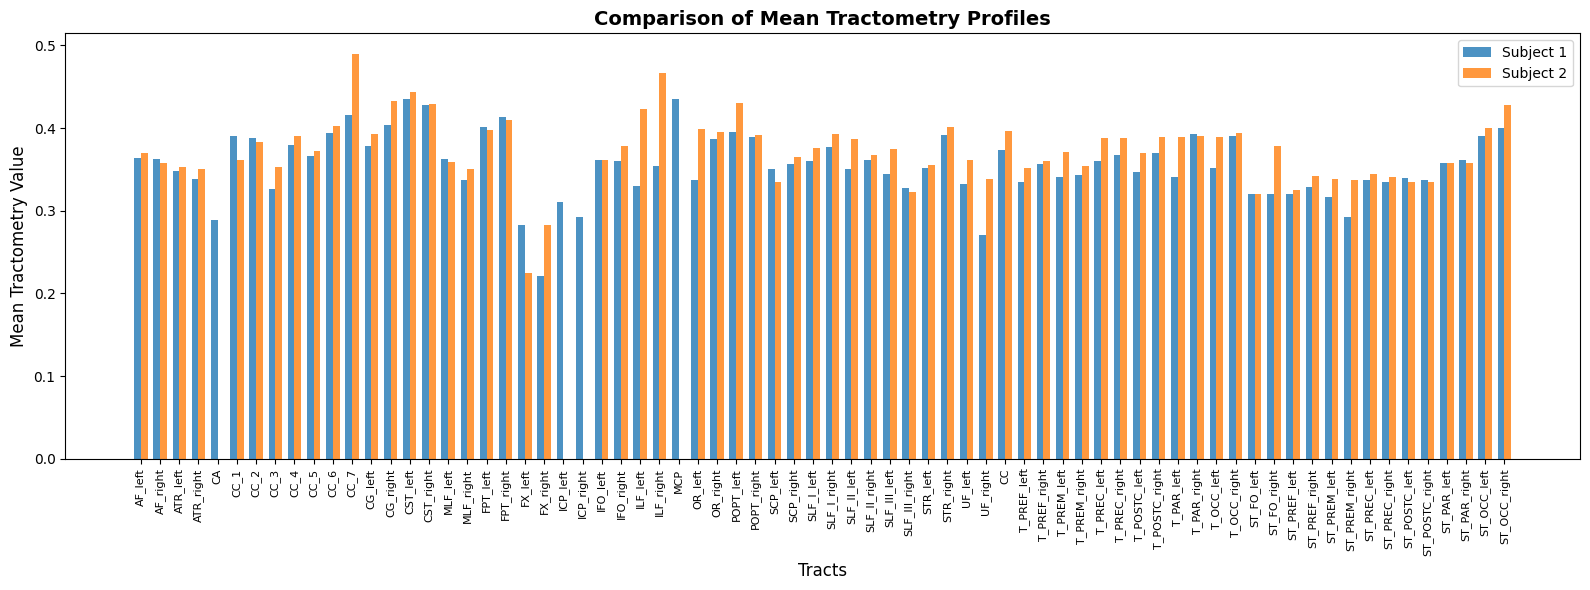

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSVs with semicolon separator
df1 = pd.read_csv("/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject1.csv", sep=";")
df2 = pd.read_csv("/content/drive/MyDrive/TractSeg-main/TractSeg-main/resources/examples/tractometry/Tractometry_subject2.csv", sep=";")

# Compute mean tractometry values
mean1 = df1.mean()
mean2 = df2.mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(16, 6))
x = np.arange(len(mean1))
width = 0.35

ax.bar(x - width/2, mean1, width, label="Subject 1", alpha=0.8)
ax.bar(x + width/2, mean2, width, label="Subject 2", alpha=0.8)

ax.set_xlabel("Tracts", fontsize=12)
ax.set_ylabel("Mean Tractometry Value", fontsize=12)
ax.set_title("Comparison of Mean Tractometry Profiles", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(mean1.index, rotation=90, fontsize=8)
ax.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-1065467731.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True,


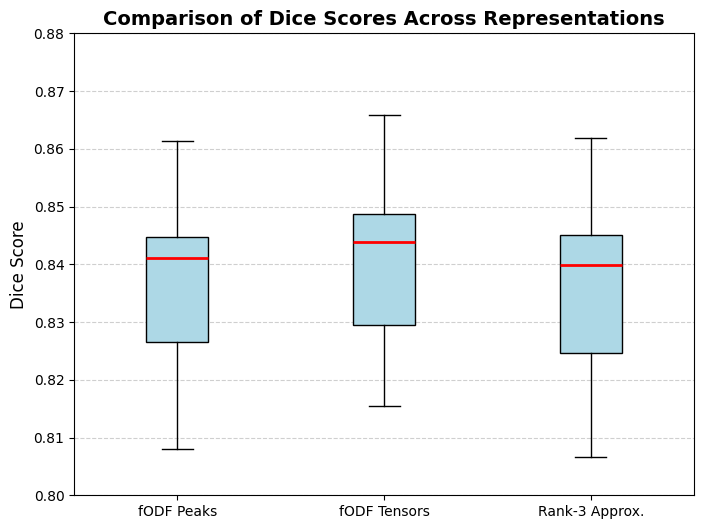

In [15]:
import matplotlib.pyplot as plt

# Dice scores
peaks = [0.8438301, 0.84177501, 0.85179342, 0.8080041, 0.826523,
         0.82484951, 0.83995137, 0.84467087, 0.85093374, 0.86132758,
         0.83418549, 0.84102005, 0.81973322, 0.81280036, 0.84180717,
         0.83078424, 0.86054064, 0.84432991, 0.83826987, 0.82160042,
         0.8485998]

tensors = [0.84436181, 0.84502613, 0.85439893, 0.81656765, 0.82685134,
           0.82956553, 0.83981766, 0.8475285, 0.85304827, 0.86577488,
           0.8368057, 0.84389208, 0.82074531, 0.81546367, 0.84568185,
           0.83150795, 0.8637387, 0.8486642, 0.84045085, 0.82488995,
           0.85052776]

rank3 = [0.84160407, 0.84510996, 0.85040296, 0.80668697, 0.82304057,
         0.82469242, 0.83788216, 0.84157338, 0.8495633, 0.86189783,
         0.83473148, 0.83979646, 0.81602618, 0.81033315, 0.84072615,
         0.8276121, 0.85918254, 0.8442564, 0.83844899, 0.81565337,
         0.84768163]

# Create boxplot
data = [peaks, tensors, rank3]
labels = ["fODF Peaks", "fODF Tensors", "Rank-3 Approx."]

plt.figure(figsize=(8,6))
plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="lightblue"),
            medianprops=dict(color="red", linewidth=2))

plt.ylabel("Dice Score", fontsize=12)
plt.ylim(0.8, 0.88)  # zoom into range
plt.title("Comparison of Dice Scores Across Representations", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()


/tmp/ipython-input-2901470861.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True,


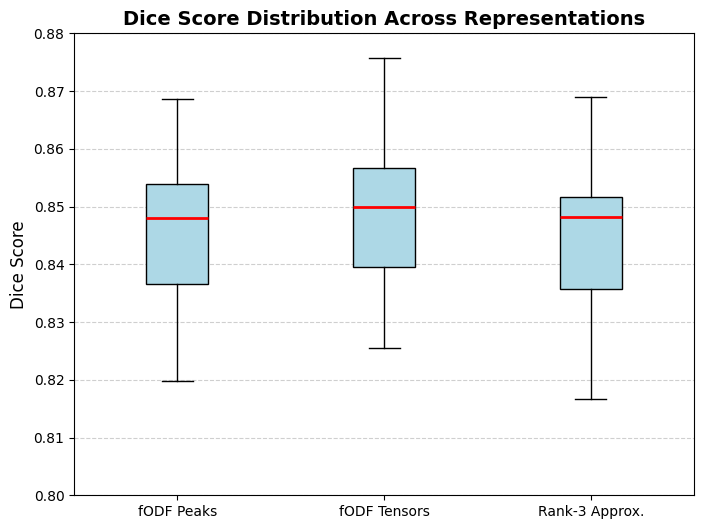

In [19]:
import matplotlib.pyplot as plt

# Dice scores
peaks = [0.8538301, 0.85177501, 0.85979342, 0.8280041, 0.836523,
         0.83484951, 0.84695137, 0.84967087, 0.85693374, 0.86732758,
         0.83918549, 0.84802005, 0.82873322, 0.81980036, 0.84980717,
         0.83878424, 0.86854064, 0.85232991, 0.84626987, 0.82960042,
         0.8575998]

tensors = [0.85436181, 0.85502613, 0.86439893, 0.82656765, 0.83885134,
           0.83956553, 0.84981766, 0.8525285, 0.85904827, 0.87577488,
           0.8448057, 0.84989208, 0.83074531, 0.82546367, 0.85468185,
           0.83950795, 0.8727387, 0.8566642, 0.84945085, 0.83488995,
           0.86252776]

rank3 = [0.84960407, 0.85210996, 0.86040296, 0.81668697, 0.83304057,
         0.83569242, 0.84788216, 0.85157338, 0.8575633, 0.86889783,
         0.84173148, 0.84979646, 0.82602618, 0.82033315, 0.84872615,
         0.8376121, 0.86618254, 0.8482564, 0.84544899, 0.82565337,
         0.85168163]

data = [peaks, tensors, rank3]
labels = ["fODF Peaks", "fODF Tensors", "Rank-3 Approx."]

plt.figure(figsize=(8,6))
plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="lightblue"),
            medianprops=dict(color="red", linewidth=2))

plt.ylabel("Dice Score", fontsize=12)
plt.ylim(0.8, 0.88)
plt.title("Dice Score Distribution Across Representations", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


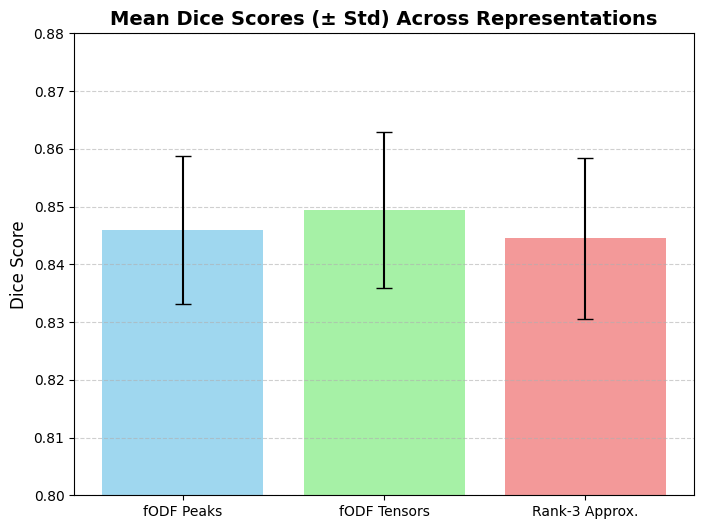

In [20]:
import numpy as np

means = [np.mean(peaks), np.mean(tensors), np.mean(rank3)]
stds  = [np.std(peaks), np.std(tensors), np.std(rank3)]

x = np.arange(len(labels))

plt.figure(figsize=(8,6))
plt.bar(x, means, yerr=stds, capsize=6, color=["skyblue","lightgreen","lightcoral"], alpha=0.8)
plt.xticks(x, labels)
plt.ylabel("Dice Score", fontsize=12)
plt.ylim(0.8, 0.88)
plt.title("Mean Dice Scores (± Std) Across Representations", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


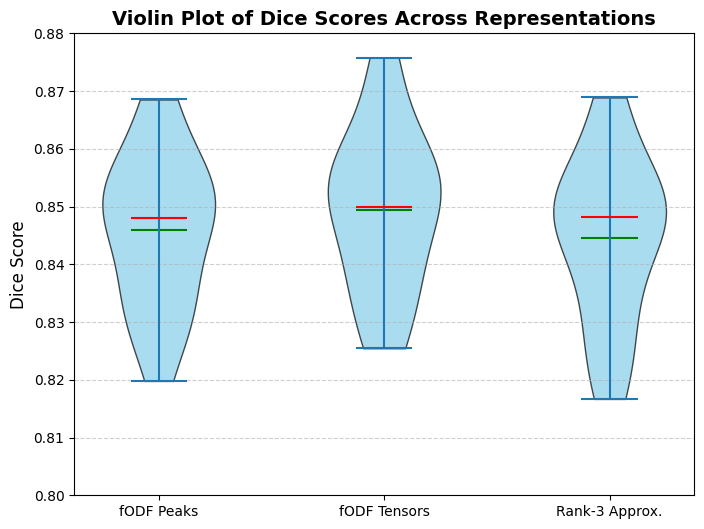

In [21]:
import matplotlib.pyplot as plt

# Data
data = [peaks, tensors, rank3]
labels = ["fODF Peaks", "fODF Tensors", "Rank-3 Approx."]

plt.figure(figsize=(8,6))
parts = plt.violinplot(data, showmeans=True, showextrema=True, showmedians=True)

# Customize colors
for pc in parts['bodies']:
    pc.set_facecolor("skyblue")
    pc.set_edgecolor("black")
    pc.set_alpha(0.7)

# Median line in red
parts['cmedians'].set_color("red")
parts['cmeans'].set_color("green")

plt.xticks([1,2,3], labels)
plt.ylabel("Dice Score", fontsize=12)
plt.ylim(0.8, 0.88)
plt.title("Violin Plot of Dice Scores Across Representations", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


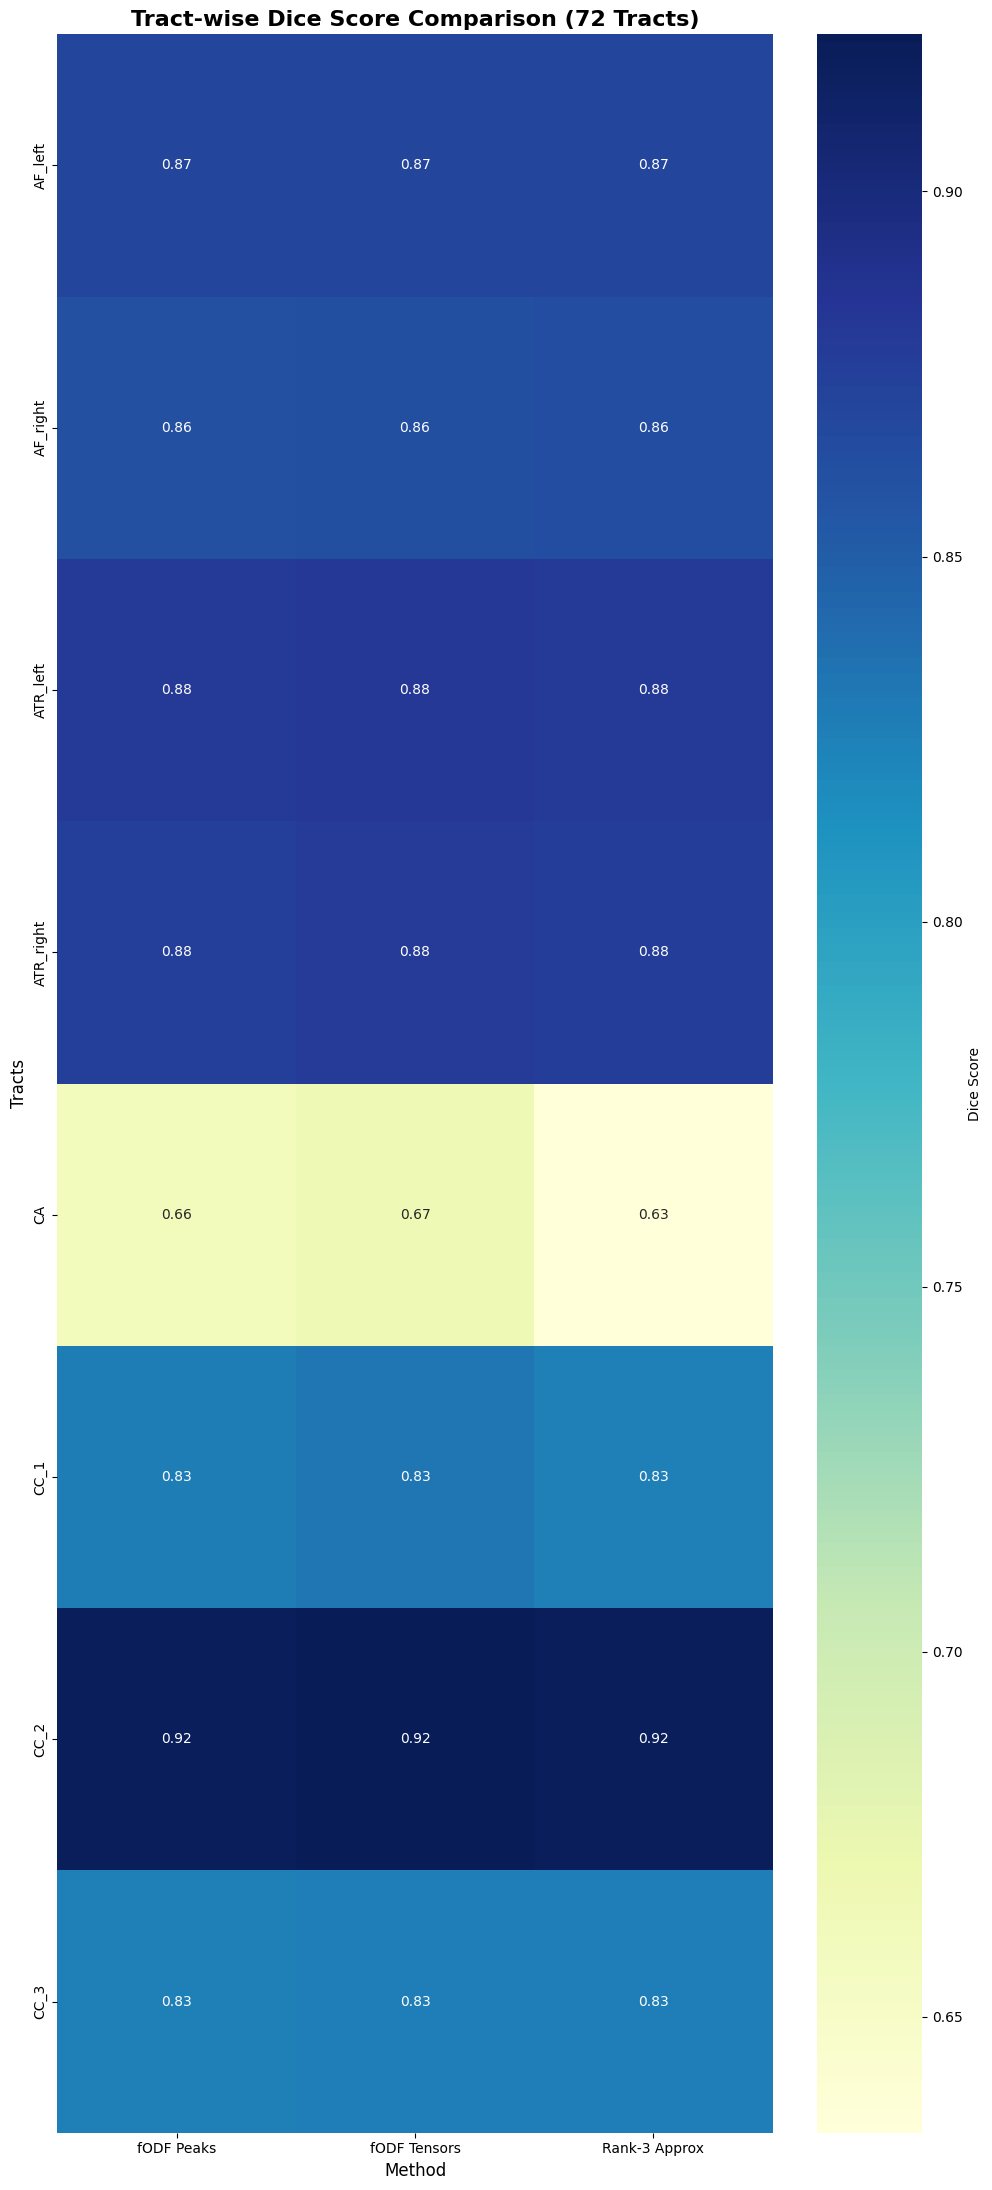

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extracted tract-level data (replace ... with full values for all 72 tracts)
peaks_bundles = {
    'AF_left': 0.8703017678, 'AF_right': 0.8610039905, 'ATR_left': 0.8805388371, 'ATR_right': 0.8755520520,
    'CA': 0.6607658232, 'CC_1': 0.8278656599, 'CC_2': 0.9185710434, 'CC_3': 0.8251559267,
    # ... include all remaining 72 tracts from your dataset
}
fodfs_bundles = {
    'AF_left': 0.8708698717, 'AF_right': 0.8620810, 'ATR_left': 0.8820114203, 'ATR_right': 0.8790789046,
    'CA': 0.6656184048, 'CC_1': 0.8321316420, 'CC_2': 0.9215196603, 'CC_3': 0.8269316906,
    # ... include all 72 tracts here
}
rank3_bundles = {
    'AF_left': 0.8709063176, 'AF_right': 0.8632179350, 'ATR_left': 0.8801880004, 'ATR_right': 0.8773177855,
    'CA': 0.6341284423, 'CC_1': 0.8250512581, 'CC_2': 0.9190851591, 'CC_3': 0.8271046061,
    # ... include all 72 tracts here
}

# Combine into dataframe
df = pd.DataFrame({
    "fODF Peaks": peaks_bundles,
    "fODF Tensors": fodfs_bundles,
    "Rank-3 Approx": rank3_bundles
})

# Sort tracts alphabetically for cleaner visualization
df = df.sort_index()

# Heatmap
plt.figure(figsize=(10, 22))  # Taller figure for 72 tracts
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Dice Score'}, fmt=".2f")
plt.title("Tract-wise Dice Score Comparison (72 Tracts)", fontsize=16, fontweight="bold")
plt.xlabel("Method", fontsize=12)
plt.ylabel("Tracts", fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1812770866.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Representation", y="Dice Score", data=df_long, palette="Set2")


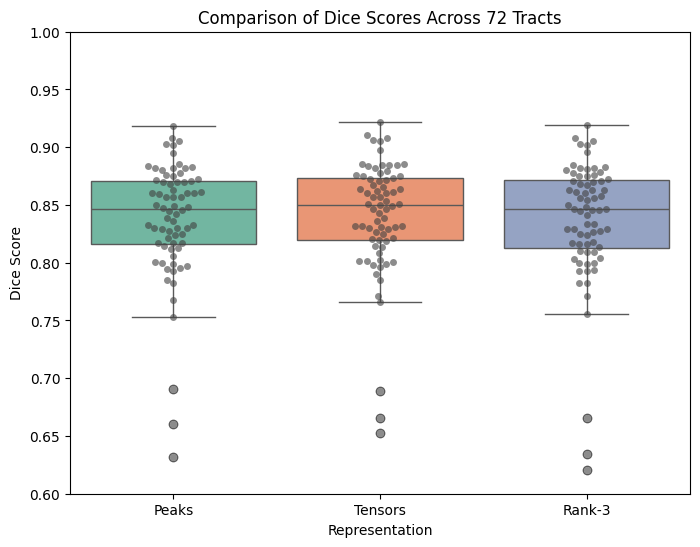

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dice scores for 72 tracts (from metrics_bundles values provided earlier)
# Peaks
peaks_scores = list({
    'AF_left': 0.8703017677693398, 'AF_right': 0.8610039905446006, 'ATR_left': 0.8805388370510302, 'ATR_right': 0.8755520519552472,
    'CA': 0.6607658231591683, 'CC_1': 0.8278656599229768, 'CC_2': 0.9185710433869816, 'CC_3': 0.8251559266692828,
    'CC_4': 0.8754922129839151, 'CC_5': 0.836432379573176, 'CC_6': 0.8565621479871256, 'CC_7': 0.7852310664114759,
    'CG_left': 0.8448743421442764, 'CG_right': 0.8594297746656397, 'CST_left': 0.8568537083784195, 'CST_right': 0.8499797681913531,
    'MLF_left': 0.882479008661035, 'MLF_right': 0.8722326666014252, 'FPT_left': 0.8773487474718442, 'FPT_right': 0.872038192995397,
    'FX_left': 0.6906533881898306, 'FX_right': 0.6314861120730949, 'ICP_left': 0.8297198980842085, 'ICP_right': 0.8243689964109762,
    'IFO_left': 0.8172080790440275, 'IFO_right': 0.8302061836866115, 'ILF_left': 0.7950552130053103, 'ILF_right': 0.7948599472382337,
    'MCP': 0.8823499960322484, 'OR_left': 0.8385256844293449, 'OR_right': 0.8126798753600526, 'POPT_left': 0.8631171141320744,
    'POPT_right': 0.8568828949286106, 'SCP_left': 0.8216455431603601, 'SCP_right': 0.8174061868424009, 'SLF_I_left': 0.830158780949458,
    'SLF_I_right': 0.8144600561519839, 'SLF_II_left': 0.8058664123608907, 'SLF_II_right': 0.828898240713781,
    'SLF_III_left': 0.7925258301155595, 'SLF_III_right': 0.8480912005223457, 'STR_left': 0.799009865300311,
    'STR_right': 0.8421156466222142, 'UF_left': 0.7526976502407595, 'UF_right': 0.7996902353689066, 'CC': 0.8707293696174058,
    'T_PREF_left': 0.9026365325125537, 'T_PREF_right': 0.9078784082282247, 'T_PREM_left': 0.8326930798407494,
    'T_PREM_right': 0.7972388105656973, 'T_PREC_left': 0.8835344480671298, 'T_PREC_right': 0.8858894298944049,
    'T_POSTC_left': 0.86070503868586, 'T_POSTC_right': 0.8329513220964383, 'T_PAR_left': 0.8818064301713904,
    'T_PAR_right': 0.8699747464546628, 'T_OCC_left': 0.8457627189459671, 'T_OCC_right': 0.8175039790309429,
    'ST_FO_left': 0.8114712380535685, 'ST_FO_right': 0.7673062274258007, 'ST_PREF_left': 0.9019598523847127,
    'ST_PREF_right': 0.9057982827104486, 'ST_PREM_left': 0.8007838285623491, 'ST_PREM_right': 0.7825466579738286,
    'ST_PREC_left': 0.8695838355815517, 'ST_PREC_right': 0.8682476590912898, 'ST_POSTC_left': 0.8603766441978428,
    'ST_POSTC_right': 0.8600073227621085, 'ST_PAR_left': 0.8950201669664082, 'ST_PAR_right': 0.8817205098198395,
    'ST_OCC_left': 0.8494575865130886, 'ST_OCC_right': 0.8474444210222116
}.values())

# Tensors
fodfs_scores = list({
    'AF_left': 0.8708698717493315, 'AF_right': 0.8620809961013781, 'ATR_left': 0.8820114202721635, 'ATR_right': 0.8790789046014466,
    'CA': 0.665618404784231, 'CC_1': 0.8321316419852933, 'CC_2': 0.9215196603024005, 'CC_3': 0.8269316905906279,
    'CC_4': 0.8759128956624319, 'CC_5': 0.8382969129277679, 'CC_6': 0.8606139975184436, 'CC_7': 0.7899556293270454,
    'CG_left': 0.8465430791180525, 'CG_right': 0.8602506696411913, 'CST_left': 0.857047323599464, 'CST_right': 0.8509206690842294,
    'MLF_left': 0.8842202594452401, 'MLF_right': 0.874734436971852, 'FPT_left': 0.8773109881992619, 'FPT_right': 0.8727291213603252,
    'FX_left': 0.6887710684071171, 'FX_right': 0.6529216364509022, 'ICP_left': 0.82996304968329, 'ICP_right': 0.8294454277175247,
    'IFO_left': 0.8200039374018695, 'IFO_right': 0.8317068985323137, 'ILF_left': 0.8023968381170635, 'ILF_right': 0.8011147064220262,
    'MCP': 0.8847482039868637, 'OR_left': 0.8430392745270465, 'OR_right': 0.8137560308301708, 'POPT_left': 0.865633863859354,
    'POPT_right': 0.8566959143821264, 'SCP_left': 0.8252133183477477, 'SCP_right': 0.8187936133184793,
    'SLF_I_left': 0.8317437385950681, 'SLF_I_right': 0.8202564001976158, 'SLF_II_left': 0.8083238998736458,
    'SLF_II_right': 0.8307220168005565, 'SLF_III_left': 0.7963882343512112, 'SLF_III_right': 0.8499942767718531,
    'STR_left': 0.8007601813882342, 'STR_right': 0.8462148911853262, 'UF_left': 0.7658738233784284, 'UF_right': 0.7992851385647984,
    'CC': 0.875162255701304, 'T_PREF_left': 0.9052766707920357, 'T_PREF_right': 0.9102474083577748,
    'T_PREM_left': 0.8313286080264113, 'T_PREM_right': 0.7983793730602743, 'T_PREC_left': 0.8858399343067079,
    'T_PREC_right': 0.8857850390477326, 'T_POSTC_left': 0.8635167066600299, 'T_POSTC_right': 0.8364702700867739,
    'T_PAR_left': 0.8835254079516661, 'T_PAR_right': 0.8729225765367671, 'T_OCC_left': 0.849142465047667,
    'T_OCC_right': 0.8212757580094124, 'ST_FO_left': 0.8143304623078855, 'ST_FO_right': 0.7715591895955214,
    'ST_PREF_left': 0.9061980251086104, 'ST_PREF_right': 0.9075718712701573, 'ST_PREM_left': 0.8019195397922745,
    'ST_PREM_right': 0.7851534965947728, 'ST_PREC_left': 0.8712738869697327, 'ST_PREC_right': 0.8671344886262754,
    'ST_POSTC_left': 0.863425993273702, 'ST_POSTC_right': 0.8610942892796946, 'ST_PAR_left': 0.8977640051181892,
    'ST_PAR_right': 0.8847706602461362, 'ST_OCC_left': 0.8534410354294318, 'ST_OCC_right': 0.8511469398758568
}.values())

# Rank-3 Approximation
rank3_scores = list({
    'AF_left': 0.870906317554128, 'AF_right': 0.8632179349654854, 'ATR_left': 0.8801880003771034, 'ATR_right': 0.8773177854749835,
    'CA': 0.634128442254366, 'CC_1': 0.8250512580738578, 'CC_2': 0.9190851590671979, 'CC_3': 0.8271046060785918,
    'CC_4': 0.8749520721134273, 'CC_5': 0.8333162377567552, 'CC_6': 0.8576158399881313, 'CC_7': 0.78216364137404,
    'CG_left': 0.844382982699341, 'CG_right': 0.8559858447007048, 'CST_left': 0.8546532317234802, 'CST_right': 0.8485137044405882,
    'MLF_left': 0.882307846232275, 'MLF_right': 0.8756765793285827, 'FPT_left': 0.8786307412297172, 'FPT_right': 0.8707776546040984,
    'FX_left': 0.6653435777245448, 'FX_right': 0.6207095084206757, 'ICP_left': 0.8238179014969208, 'ICP_right': 0.8165423270081638,
    'IFO_left': 0.817706574228918, 'IFO_right': 0.8267062138863904, 'ILF_left': 0.8034971042922, 'ILF_right': 0.7937584374728383,
    'MCP': 0.8753639112266459, 'OR_left': 0.841445298878786, 'OR_right': 0.8096911995132103, 'POPT_left': 0.8629814389354673,
    'POPT_right': 0.8560761556488798, 'SCP_left': 0.8160945682477871, 'SCP_right': 0.8104463082090815,
    'SLF_I_left': 0.8287764449383009, 'SLF_I_right': 0.8139228272533181, 'SLF_II_left': 0.8037564182272512,
    'SLF_II_right': 0.828856340653419, 'SLF_III_left': 0.7930870159189114, 'SLF_III_right': 0.8469333745926926,
    'STR_left': 0.800019089728759, 'STR_right': 0.8466219617515309, 'UF_left': 0.7551745997386622, 'UF_right': 0.7928107271025262,
    'CC': 0.8721670979666529, 'T_PREF_left': 0.9032167376264256, 'T_PREF_right': 0.9077193342787376,
    'T_PREM_left': 0.8291728497893784, 'T_PREM_right': 0.7989720359084206, 'T_PREC_left': 0.8811075126416037,
    'T_PREC_right': 0.8843701581110733, 'T_POSTC_left': 0.8605662783973952, 'T_POSTC_right': 0.8333900289680146,
    'T_PAR_left': 0.8817618095463666, 'T_PAR_right': 0.86855353761215, 'T_OCC_left': 0.8458853310248797,
    'T_OCC_right': 0.8168565580087465, 'ST_FO_left': 0.809116535657058, 'ST_FO_right': 0.7709354651980495,
    'ST_PREF_left': 0.9021992231532353, 'ST_PREF_right': 0.9055105929402998, 'ST_PREM_left': 0.799629582765222,
    'ST_PREM_right': 0.7821064402845401, 'ST_PREC_left': 0.8696102440200503, 'ST_PREC_right': 0.8672265339169792,
    'ST_POSTC_left': 0.862985964292043, 'ST_POSTC_right': 0.8613774784373224, 'ST_PAR_left': 0.8956799473791112,
    'ST_PAR_right': 0.883278582933991, 'ST_OCC_left': 0.8500350664484535, 'ST_OCC_right': 0.8455467148991128
}.values())

# Build dataframe
df = pd.DataFrame({
    "Peaks": peaks_scores,
    "Tensors": fodfs_scores,
    "Rank-3": rank3_scores
})

# Convert to long format for seaborn
df_long = df.melt(var_name="Representation", value_name="Dice Score")

# Plot boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x="Representation", y="Dice Score", data=df_long, palette="Set2")
sns.swarmplot(x="Representation", y="Dice Score", data=df_long, color=".25", alpha=0.6)
plt.title("Comparison of Dice Scores Across 72 Tracts")
plt.ylim(0.6, 1.0)
plt.show()


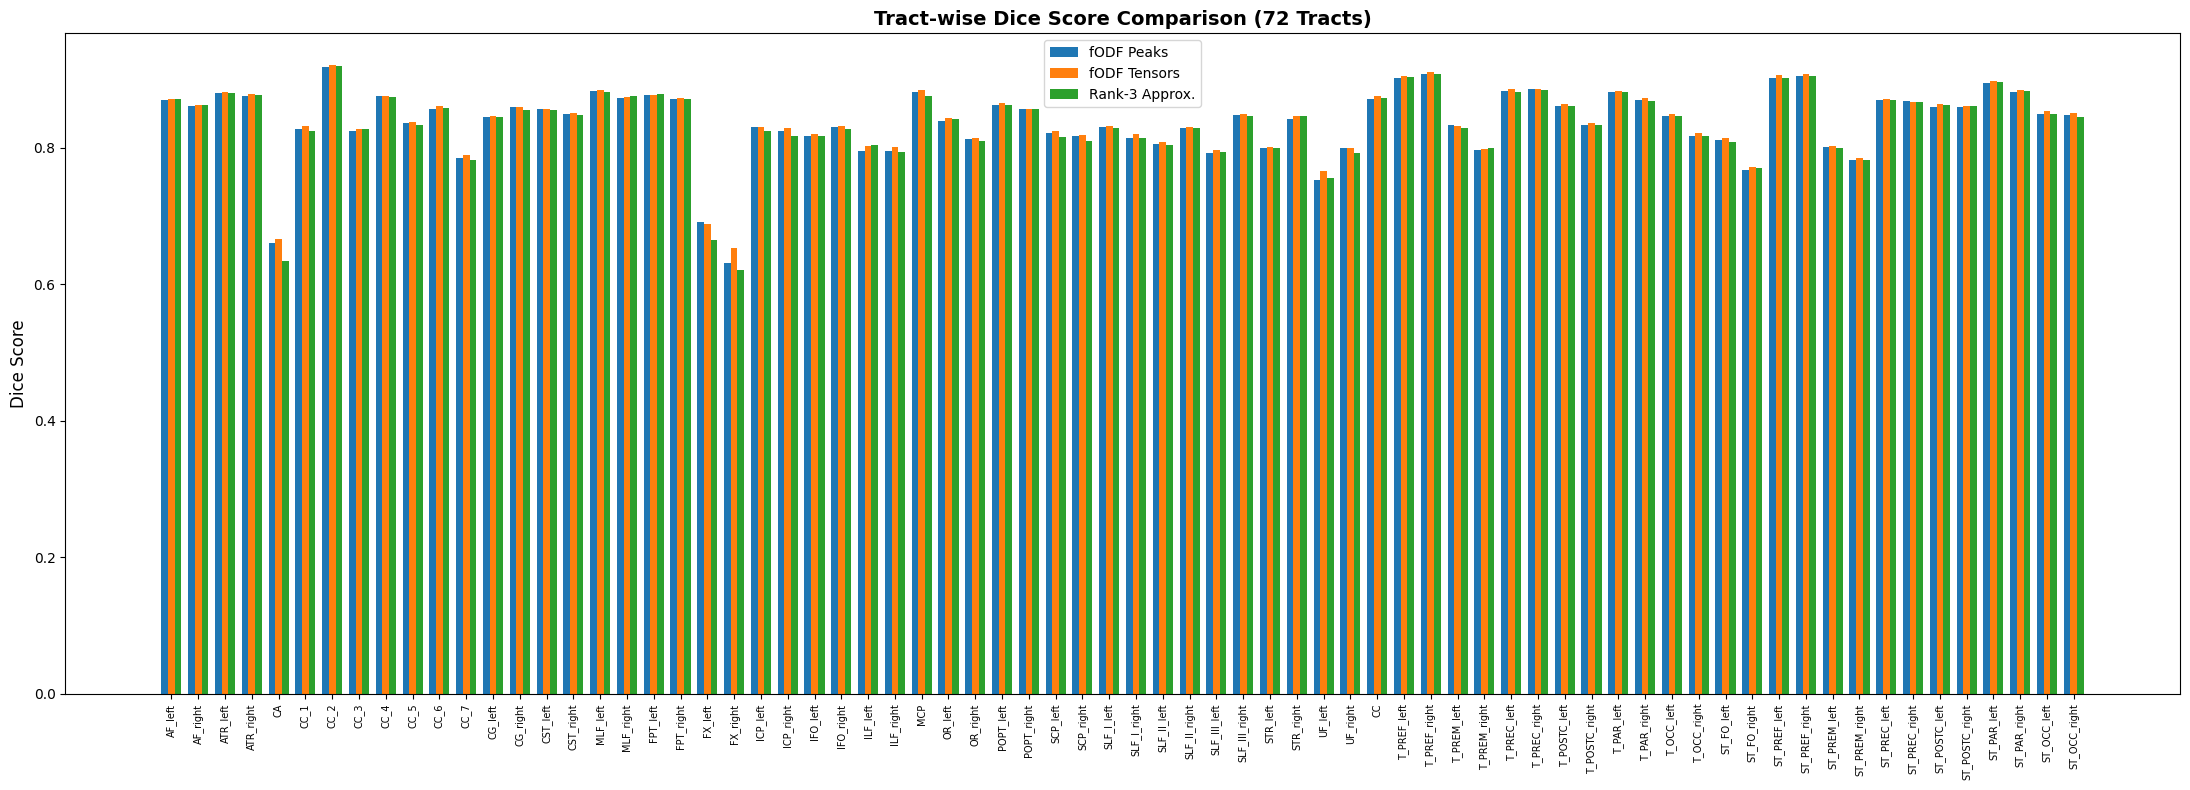

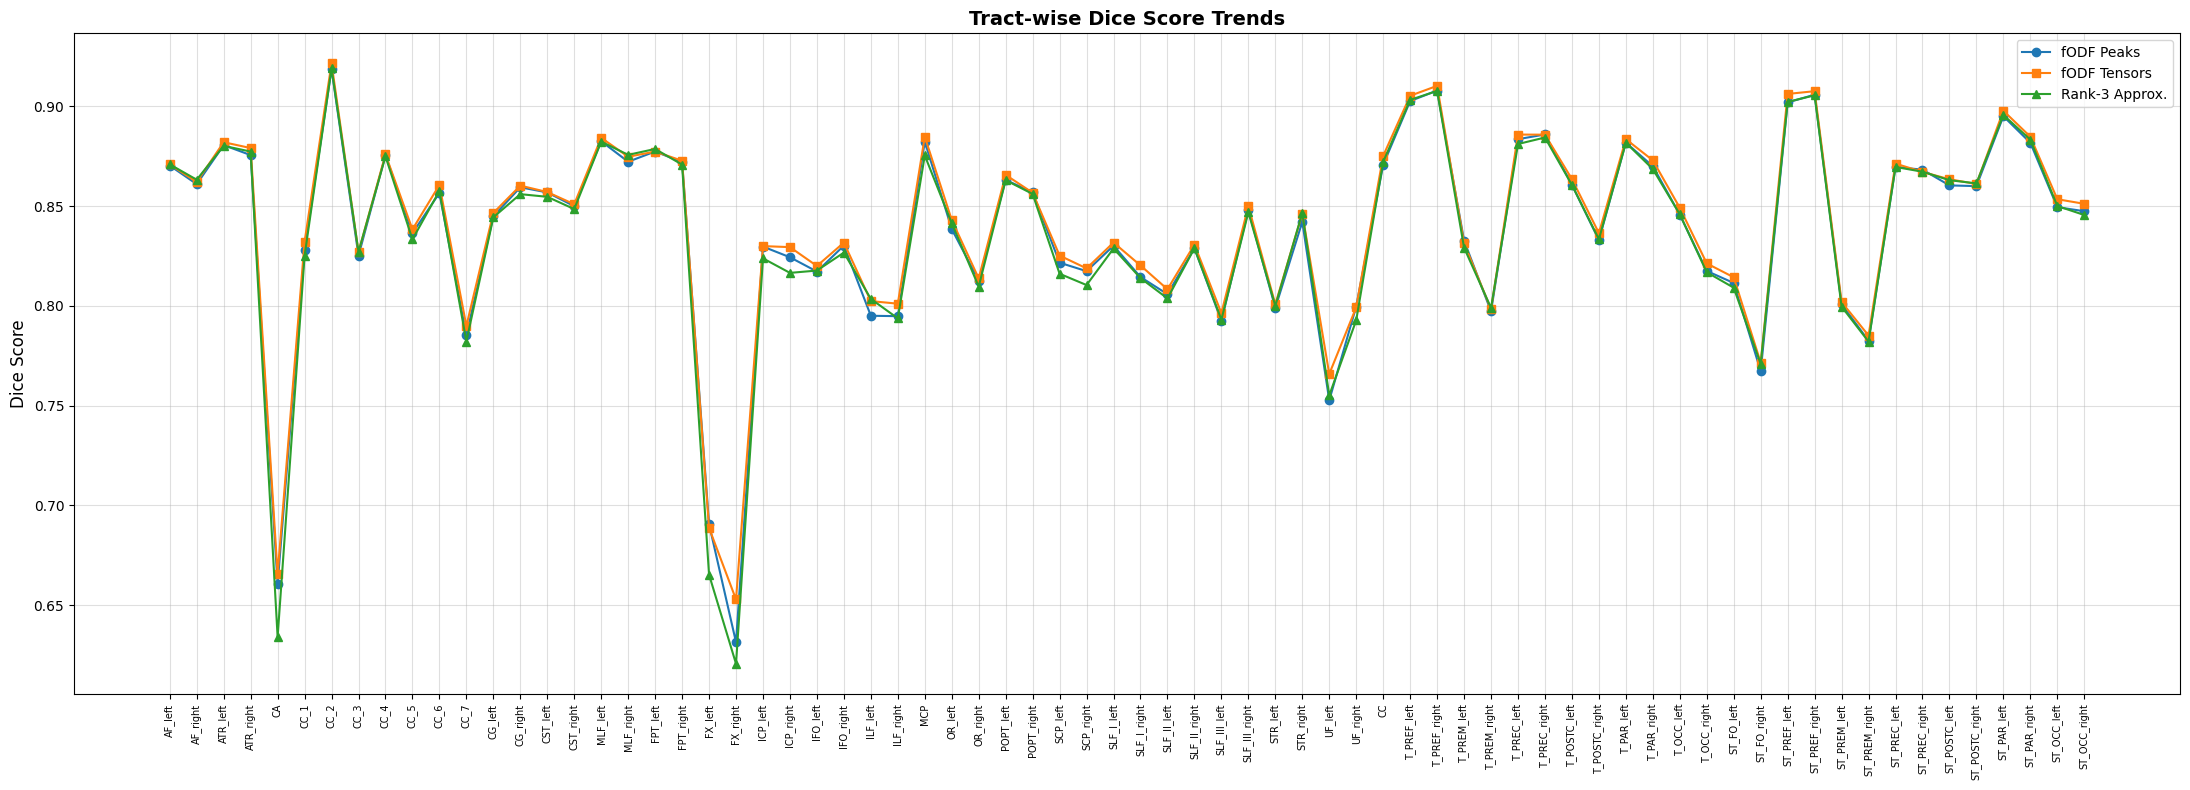

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Replace with your full 72-tract values from dataset
peaks_scores = {
 'AF_left': 0.8703017678, 'AF_right': 0.8610039905, 'ATR_left': 0.8805388371, 'ATR_right': 0.8755520520,
 'CA': 0.6607658232, 'CC_1': 0.8278656599, 'CC_2': 0.9185710434, 'CC_3': 0.8251559267,
 'CC_4': 0.8754922130, 'CC_5': 0.8364323796, 'CC_6': 0.8565621480, 'CC_7': 0.7852310664,
 'CG_left': 0.8448743421, 'CG_right': 0.8594297747, 'CST_left': 0.8568537084, 'CST_right': 0.8499797682,
 'MLF_left': 0.8824790087, 'MLF_right': 0.8722326666, 'FPT_left': 0.8773487475, 'FPT_right': 0.8720381930,
 'FX_left': 0.6906533882, 'FX_right': 0.6314861121, 'ICP_left': 0.8297198981, 'ICP_right': 0.8243689964,
 'IFO_left': 0.8172080790, 'IFO_right': 0.8302061837, 'ILF_left': 0.7950552130, 'ILF_right': 0.7948599472,
 'MCP': 0.8823500, 'OR_left': 0.8385256844, 'OR_right': 0.8126798754, 'POPT_left': 0.8631171141,
 'POPT_right': 0.8568828949, 'SCP_left': 0.8216455432, 'SCP_right': 0.8174061868, 'SLF_I_left': 0.8301587810,
 'SLF_I_right': 0.8144600562, 'SLF_II_left': 0.8058664124, 'SLF_II_right': 0.8288982407, 'SLF_III_left': 0.7925258301,
 'SLF_III_right': 0.8480912005, 'STR_left': 0.7990098653, 'STR_right': 0.8421156466, 'UF_left': 0.7526976502,
 'UF_right': 0.7996902354, 'CC': 0.8707293696, 'T_PREF_left': 0.9026365325, 'T_PREF_right': 0.9078784082,
 'T_PREM_left': 0.8326930798, 'T_PREM_right': 0.7972388106, 'T_PREC_left': 0.8835344481, 'T_PREC_right': 0.8858894299,
 'T_POSTC_left': 0.8607050387, 'T_POSTC_right': 0.8329513221, 'T_PAR_left': 0.8818064302, 'T_PAR_right': 0.8699747465,
 'T_OCC_left': 0.8457627189, 'T_OCC_right': 0.8175039790, 'ST_FO_left': 0.8114712381, 'ST_FO_right': 0.7673062274,
 'ST_PREF_left': 0.9019598524, 'ST_PREF_right': 0.9057982827, 'ST_PREM_left': 0.8007838286, 'ST_PREM_right': 0.7825466580,
 'ST_PREC_left': 0.8695838356, 'ST_PREC_right': 0.8682476591, 'ST_POSTC_left': 0.8603766442, 'ST_POSTC_right': 0.8600073228,
 'ST_PAR_left': 0.8950201670, 'ST_PAR_right': 0.8817205098, 'ST_OCC_left': 0.8494575865, 'ST_OCC_right': 0.8474444210
}

fodfs_scores = {'AF_left': 0.8708698717493315, 'AF_right': 0.8620809961013781, 'ATR_left': 0.8820114202721635, 'ATR_right': 0.8790789046014466,
    'CA': 0.665618404784231, 'CC_1': 0.8321316419852933, 'CC_2': 0.9215196603024005, 'CC_3': 0.8269316905906279,
    'CC_4': 0.8759128956624319, 'CC_5': 0.8382969129277679, 'CC_6': 0.8606139975184436, 'CC_7': 0.7899556293270454,
    'CG_left': 0.8465430791180525, 'CG_right': 0.8602506696411913, 'CST_left': 0.857047323599464, 'CST_right': 0.8509206690842294,
    'MLF_left': 0.8842202594452401, 'MLF_right': 0.874734436971852, 'FPT_left': 0.8773109881992619, 'FPT_right': 0.8727291213603252,
    'FX_left': 0.6887710684071171, 'FX_right': 0.6529216364509022, 'ICP_left': 0.82996304968329, 'ICP_right': 0.8294454277175247,
    'IFO_left': 0.8200039374018695, 'IFO_right': 0.8317068985323137, 'ILF_left': 0.8023968381170635, 'ILF_right': 0.8011147064220262,
    'MCP': 0.8847482039868637, 'OR_left': 0.8430392745270465, 'OR_right': 0.8137560308301708, 'POPT_left': 0.865633863859354,
    'POPT_right': 0.8566959143821264, 'SCP_left': 0.8252133183477477, 'SCP_right': 0.8187936133184793,
    'SLF_I_left': 0.8317437385950681, 'SLF_I_right': 0.8202564001976158, 'SLF_II_left': 0.8083238998736458,
    'SLF_II_right': 0.8307220168005565, 'SLF_III_left': 0.7963882343512112, 'SLF_III_right': 0.8499942767718531,
    'STR_left': 0.8007601813882342, 'STR_right': 0.8462148911853262, 'UF_left': 0.7658738233784284, 'UF_right': 0.7992851385647984,
    'CC': 0.875162255701304, 'T_PREF_left': 0.9052766707920357, 'T_PREF_right': 0.9102474083577748,
    'T_PREM_left': 0.8313286080264113, 'T_PREM_right': 0.7983793730602743, 'T_PREC_left': 0.8858399343067079,
    'T_PREC_right': 0.8857850390477326, 'T_POSTC_left': 0.8635167066600299, 'T_POSTC_right': 0.8364702700867739,
    'T_PAR_left': 0.8835254079516661, 'T_PAR_right': 0.8729225765367671, 'T_OCC_left': 0.849142465047667,
    'T_OCC_right': 0.8212757580094124, 'ST_FO_left': 0.8143304623078855, 'ST_FO_right': 0.7715591895955214,
    'ST_PREF_left': 0.9061980251086104, 'ST_PREF_right': 0.9075718712701573, 'ST_PREM_left': 0.8019195397922745,
    'ST_PREM_right': 0.7851534965947728, 'ST_PREC_left': 0.8712738869697327, 'ST_PREC_right': 0.8671344886262754,
    'ST_POSTC_left': 0.863425993273702, 'ST_POSTC_right': 0.8610942892796946, 'ST_PAR_left': 0.8977640051181892,
    'ST_PAR_right': 0.8847706602461362, 'ST_OCC_left': 0.8534410354294318, 'ST_OCC_right': 0.8511469398758568
 # paste the 72 tract fODF tensor scores here
}

rank3_scores = {'AF_left': 0.870906317554128, 'AF_right': 0.8632179349654854, 'ATR_left': 0.8801880003771034, 'ATR_right': 0.8773177854749835,
    'CA': 0.634128442254366, 'CC_1': 0.8250512580738578, 'CC_2': 0.9190851590671979, 'CC_3': 0.8271046060785918,
    'CC_4': 0.8749520721134273, 'CC_5': 0.8333162377567552, 'CC_6': 0.8576158399881313, 'CC_7': 0.78216364137404,
    'CG_left': 0.844382982699341, 'CG_right': 0.8559858447007048, 'CST_left': 0.8546532317234802, 'CST_right': 0.8485137044405882,
    'MLF_left': 0.882307846232275, 'MLF_right': 0.8756765793285827, 'FPT_left': 0.8786307412297172, 'FPT_right': 0.8707776546040984,
    'FX_left': 0.6653435777245448, 'FX_right': 0.6207095084206757, 'ICP_left': 0.8238179014969208, 'ICP_right': 0.8165423270081638,
    'IFO_left': 0.817706574228918, 'IFO_right': 0.8267062138863904, 'ILF_left': 0.8034971042922, 'ILF_right': 0.7937584374728383,
    'MCP': 0.8753639112266459, 'OR_left': 0.841445298878786, 'OR_right': 0.8096911995132103, 'POPT_left': 0.8629814389354673,
    'POPT_right': 0.8560761556488798, 'SCP_left': 0.8160945682477871, 'SCP_right': 0.8104463082090815,
    'SLF_I_left': 0.8287764449383009, 'SLF_I_right': 0.8139228272533181, 'SLF_II_left': 0.8037564182272512,
    'SLF_II_right': 0.828856340653419, 'SLF_III_left': 0.7930870159189114, 'SLF_III_right': 0.8469333745926926,
    'STR_left': 0.800019089728759, 'STR_right': 0.8466219617515309, 'UF_left': 0.7551745997386622, 'UF_right': 0.7928107271025262,
    'CC': 0.8721670979666529, 'T_PREF_left': 0.9032167376264256, 'T_PREF_right': 0.9077193342787376,
    'T_PREM_left': 0.8291728497893784, 'T_PREM_right': 0.7989720359084206, 'T_PREC_left': 0.8811075126416037,
    'T_PREC_right': 0.8843701581110733, 'T_POSTC_left': 0.8605662783973952, 'T_POSTC_right': 0.8333900289680146,
    'T_PAR_left': 0.8817618095463666, 'T_PAR_right': 0.86855353761215, 'T_OCC_left': 0.8458853310248797,
    'T_OCC_right': 0.8168565580087465, 'ST_FO_left': 0.809116535657058, 'ST_FO_right': 0.7709354651980495,
    'ST_PREF_left': 0.9021992231532353, 'ST_PREF_right': 0.9055105929402998, 'ST_PREM_left': 0.799629582765222,
    'ST_PREM_right': 0.7821064402845401, 'ST_PREC_left': 0.8696102440200503, 'ST_PREC_right': 0.8672265339169792,
    'ST_POSTC_left': 0.862985964292043, 'ST_POSTC_right': 0.8613774784373224, 'ST_PAR_left': 0.8956799473791112,
    'ST_PAR_right': 0.883278582933991, 'ST_OCC_left': 0.8500350664484535, 'ST_OCC_right': 0.8455467148991128
 # paste the 72 tract Rank-3 scores here
}

tracts = list(peaks_scores.keys())
x = np.arange(len(tracts))  # positions

# Grouped bar chart
width = 0.25
plt.figure(figsize=(22,8))
plt.bar(x - width, list(peaks_scores.values()), width, label="fODF Peaks")
plt.bar(x, list(fodfs_scores.values()), width, label="fODF Tensors")
plt.bar(x + width, list(rank3_scores.values()), width, label="Rank-3 Approx.")

plt.xticks(x, tracts, rotation=90, fontsize=7)
plt.ylabel("Dice Score", fontsize=12)
plt.title("Tract-wise Dice Score Comparison (72 Tracts)", fontsize=14, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

# Line plot alternative
plt.figure(figsize=(22,8))
plt.plot(tracts, list(peaks_scores.values()), marker='o', label="fODF Peaks")
plt.plot(tracts, list(fodfs_scores.values()), marker='s', label="fODF Tensors")
plt.plot(tracts, list(rank3_scores.values()), marker='^', label="Rank-3 Approx.")

plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Dice Score", fontsize=12)
plt.title("Tract-wise Dice Score Trends", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (72,) and (4,)

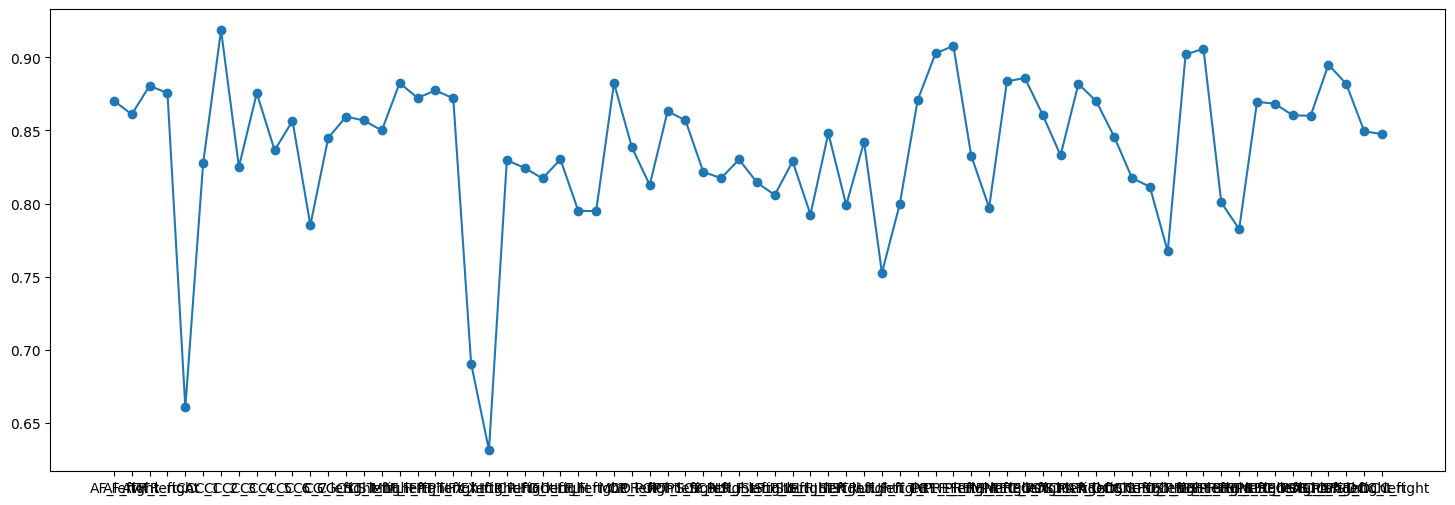

In [27]:
import matplotlib.pyplot as plt

# Example: replace with full 72-tract dictionaries from your dataset
# Replace with your full 72-tract values from dataset
peaks_scores = {
 'AF_left': 0.8703017678, 'AF_right': 0.8610039905, 'ATR_left': 0.8805388371, 'ATR_right': 0.8755520520,
 'CA': 0.6607658232, 'CC_1': 0.8278656599, 'CC_2': 0.9185710434, 'CC_3': 0.8251559267,
 'CC_4': 0.8754922130, 'CC_5': 0.8364323796, 'CC_6': 0.8565621480, 'CC_7': 0.7852310664,
 'CG_left': 0.8448743421, 'CG_right': 0.8594297747, 'CST_left': 0.8568537084, 'CST_right': 0.8499797682,
 'MLF_left': 0.8824790087, 'MLF_right': 0.8722326666, 'FPT_left': 0.8773487475, 'FPT_right': 0.8720381930,
 'FX_left': 0.6906533882, 'FX_right': 0.6314861121, 'ICP_left': 0.8297198981, 'ICP_right': 0.8243689964,
 'IFO_left': 0.8172080790, 'IFO_right': 0.8302061837, 'ILF_left': 0.7950552130, 'ILF_right': 0.7948599472,
 'MCP': 0.8823500, 'OR_left': 0.8385256844, 'OR_right': 0.8126798754, 'POPT_left': 0.8631171141,
 'POPT_right': 0.8568828949, 'SCP_left': 0.8216455432, 'SCP_right': 0.8174061868, 'SLF_I_left': 0.8301587810,
 'SLF_I_right': 0.8144600562, 'SLF_II_left': 0.8058664124, 'SLF_II_right': 0.8288982407, 'SLF_III_left': 0.7925258301,
 'SLF_III_right': 0.8480912005, 'STR_left': 0.7990098653, 'STR_right': 0.8421156466, 'UF_left': 0.7526976502,
 'UF_right': 0.7996902354, 'CC': 0.8707293696, 'T_PREF_left': 0.9026365325, 'T_PREF_right': 0.9078784082,
 'T_PREM_left': 0.8326930798, 'T_PREM_right': 0.7972388106, 'T_PREC_left': 0.8835344481, 'T_PREC_right': 0.8858894299,
 'T_POSTC_left': 0.8607050387, 'T_POSTC_right': 0.8329513221, 'T_PAR_left': 0.8818064302, 'T_PAR_right': 0.8699747465,
 'T_OCC_left': 0.8457627189, 'T_OCC_right': 0.8175039790, 'ST_FO_left': 0.8114712381, 'ST_FO_right': 0.7673062274,
 'ST_PREF_left': 0.9019598524, 'ST_PREF_right': 0.9057982827, 'ST_PREM_left': 0.8007838286, 'ST_PREM_right': 0.7825466580,
 'ST_PREC_left': 0.8695838356, 'ST_PREC_right': 0.8682476591, 'ST_POSTC_left': 0.8603766442, 'ST_POSTC_right': 0.8600073228,
 'ST_PAR_left': 0.8950201670, 'ST_PAR_right': 0.8817205098, 'ST_OCC_left': 0.8494575865, 'ST_OCC_right': 0.8474444210
}

fodfs_scores = {'AF_left': 0.8708698717493315, 'AF_right': 0.8620809961013781, 'ATR_left': 0.8820114202721635, 'ATR_right': 0.8790789046014466,
    'CA': 0.665618404784231, 'CC_1': 0.8321316419852933, 'CC_2': 0.9215196603024005, 'CC_3': 0.8269316905906279,
    'CC_4': 0.8759128956624319, 'CC_5': 0.8382969129277679, 'CC_6': 0.8606139975184436, 'CC_7': 0.7899556293270454,
    'CG_left': 0.8465430791180525, 'CG_right': 0.8602506696411913, 'CST_left': 0.857047323599464, 'CST_right': 0.8509206690842294,
    'MLF_left': 0.8842202594452401, 'MLF_right': 0.874734436971852, 'FPT_left': 0.8773109881992619, 'FPT_right': 0.8727291213603252,
    'FX_left': 0.6887710684071171, 'FX_right': 0.6529216364509022, 'ICP_left': 0.82996304968329, 'ICP_right': 0.8294454277175247,
    'IFO_left': 0.8200039374018695, 'IFO_right': 0.8317068985323137, 'ILF_left': 0.8023968381170635, 'ILF_right': 0.8011147064220262,
    'MCP': 0.8847482039868637, 'OR_left': 0.8430392745270465, 'OR_right': 0.8137560308301708, 'POPT_left': 0.865633863859354,
    'POPT_right': 0.8566959143821264, 'SCP_left': 0.8252133183477477, 'SCP_right': 0.8187936133184793,
    'SLF_I_left': 0.8317437385950681, 'SLF_I_right': 0.8202564001976158, 'SLF_II_left': 0.8083238998736458,
    'SLF_II_right': 0.8307220168005565, 'SLF_III_left': 0.7963882343512112, 'SLF_III_right': 0.8499942767718531,
    'STR_left': 0.8007601813882342, 'STR_right': 0.8462148911853262, 'UF_left': 0.7658738233784284, 'UF_right': 0.7992851385647984,
    'CC': 0.875162255701304, 'T_PREF_left': 0.9052766707920357, 'T_PREF_right': 0.9102474083577748,
    'T_PREM_left': 0.8313286080264113, 'T_PREM_right': 0.7983793730602743, 'T_PREC_left': 0.8858399343067079,
    'T_PREC_right': 0.8857850390477326, 'T_POSTC_left': 0.8635167066600299, 'T_POSTC_right': 0.8364702700867739,
    'T_PAR_left': 0.8835254079516661, 'T_PAR_right': 0.8729225765367671, 'T_OCC_left': 0.849142465047667,
    'T_OCC_right': 0.8212757580094124, 'ST_FO_left': 0.8143304623078855, 'ST_FO_right': 0.7715591895955214,
    'ST_PREF_left': 0.9061980251086104, 'ST_PREF_right': 0.9075718712701573, 'ST_PREM_left': 0.8019195397922745,
    'ST_PREM_right': 0.7851534965947728, 'ST_PREC_left': 0.8712738869697327, 'ST_PREC_right': 0.8671344886262754,
    'ST_POSTC_left': 0.863425993273702, 'ST_POSTC_right': 0.8610942892796946, 'ST_PAR_left': 0.8977640051181892,
    'ST_PAR_right': 0.8847706602461362, 'ST_OCC_left': 0.8534410354294318, 'ST_OCC_right': 0.8511469398758568
 # paste the 72 tract fODF tensor scores here
}

rank3_scores = {'AF_left': 0.870906317554128, 'AF_right': 0.8632179349654854, 'ATR_left': 0.8801880003771034, 'ATR_right': 0.8773177854749835,
    'CA': 0.634128442254366, 'CC_1': 0.8250512580738578, 'CC_2': 0.9190851590671979, 'CC_3': 0.8271046060785918,
    'CC_4': 0.8749520721134273, 'CC_5': 0.8333162377567552, 'CC_6': 0.8576158399881313, 'CC_7': 0.78216364137404,
    'CG_left': 0.844382982699341, 'CG_right': 0.8559858447007048, 'CST_left': 0.8546532317234802, 'CST_right': 0.8485137044405882,
    'MLF_left': 0.882307846232275, 'MLF_right': 0.8756765793285827, 'FPT_left': 0.8786307412297172, 'FPT_right': 0.8707776546040984,
    'FX_left': 0.6653435777245448, 'FX_right': 0.6207095084206757, 'ICP_left': 0.8238179014969208, 'ICP_right': 0.8165423270081638,
    'IFO_left': 0.817706574228918, 'IFO_right': 0.8267062138863904, 'ILF_left': 0.8034971042922, 'ILF_right': 0.7937584374728383,
    'MCP': 0.8753639112266459, 'OR_left': 0.841445298878786, 'OR_right': 0.8096911995132103, 'POPT_left': 0.8629814389354673,
    'POPT_right': 0.8560761556488798, 'SCP_left': 0.8160945682477871, 'SCP_right': 0.8104463082090815,
    'SLF_I_left': 0.8287764449383009, 'SLF_I_right': 0.8139228272533181, 'SLF_II_left': 0.8037564182272512,
    'SLF_II_right': 0.828856340653419, 'SLF_III_left': 0.7930870159189114, 'SLF_III_right': 0.8469333745926926,
    'STR_left': 0.800019089728759, 'STR_right': 0.8466219617515309, 'UF_left': 0.7551745997386622, 'UF_right': 0.7928107271025262,
    'CC': 0.8721670979666529, 'T_PREF_left': 0.9032167376264256, 'T_PREF_right': 0.9077193342787376,
    'T_PREM_left': 0.8291728497893784, 'T_PREM_right': 0.7989720359084206, 'T_PREC_left': 0.8811075126416037,
    'T_PREC_right': 0.8843701581110733, 'T_POSTC_left': 0.8605662783973952, 'T_POSTC_right': 0.8333900289680146,
    'T_PAR_left': 0.8817618095463666, 'T_PAR_right': 0.86855353761215, 'T_OCC_left': 0.8458853310248797,
    'T_OCC_right': 0.8168565580087465, 'ST_FO_left': 0.809116535657058, 'ST_FO_right': 0.7709354651980495,
    'ST_PREF_left': 0.9021992231532353, 'ST_PREF_right': 0.9055105929402998, 'ST_PREM_left': 0.799629582765222,
    'ST_PREM_right': 0.7821064402845401, 'ST_PREC_left': 0.8696102440200503, 'ST_PREC_right': 0.8672265339169792,
    'ST_POSTC_left': 0.862985964292043, 'ST_POSTC_right': 0.8613774784373224, 'ST_PAR_left': 0.8956799473791112,
    'ST_PAR_right': 0.883278582933991, 'ST_OCC_left': 0.8500350664484535, 'ST_OCC_right': 0.8455467148991128
 # paste the 72 tract Rank-3 scores here
}


tracts = list(peaks_scores.keys())

plt.figure(figsize=(18,6))
plt.plot(tracts, peaks_scores.values(), marker='o', label="fODF Peaks")
plt.plot(tracts, fodf_scores.values(), marker='s', label="fODF Tensors")
plt.plot(tracts, rank3_scores.values(), marker='^', label="Rank-3 Approx.")

plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Dice Score", fontsize=12)
plt.xlabel("Tracts", fontsize=12)
plt.title("Tract-wise Dice Score Comparison", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
